In [14]:
import pandas as pd

column_names = [
    "url",          # 0: https://...
    "title",        # 1: Vente Maison...
    "location",     # 2: Bray sur seine...
    "desc_short",   # 3: Description T4...
    "description",  # 4: À Vendre...
    "rooms",        # 5: 4
    "surface",      # 6: 92
    "price",        # 7: 139 750
    "agency",       # 8: L'ADRESSE CHESSY
    "agencement",   # 9: 3 chambres, 1 salle de bain
    "general",    # 10: (vide dans ton exemple)
    "annexes",      # 11: Cave
    "dependence",      # 12: Terrasse
    "id_tech",      # 13: 1764140340
    "reference"     # 14: ParuVendu...
]

try:
    df = pd.read_csv(
        "data/results.csv",
        header=None,
        names=column_names,
        dtype=str,
        on_bad_lines='skip'  # Si une ligne est mal formée, on la saute au lieu de planter
    )
except Exception as e:
    print(f"Erreur à l'ouverture du fichier : {e}")
    df = pd.DataFrame()

df.head()

,url,title,location,desc_short,description,rooms,surface,price,agency,agencement,general,annexes,dependence,id_tech,reference
0,https://www.paruvendu.fr/immobilier/vente/mais...,Vente Maison 4 pièces 92 m²,Bray sur seine (77480),Description T4 à Bray sur seine,À Vendre - Maison avec fort potentiel sur 1 54...,4,92,139 750,L'ADRESSE CHESSY,"3 chambres,1 salle de bain",NaN,Cave,Terrasse,1764140340,ParuVendu 14156758_1283B
1,https://www.paruvendu.fr/immobilier/vente/mais...,Vente Maison 5 pièces 132 m²,Provins (77160),Description T5 à Provins,Propriété de charme - Deux maisons + dépendanc...,5,132,139 750,L'ADRESSE CHESSY,"3 chambres,2 salles d'eau",NaN,Cave,NaN,1764140340,ParuVendu 14156709_1284P
2,https://www.paruvendu.fr/immobilier/vente/mais...,Vente Maison 7 pièces 150 m²,Orsay (91400),Description T7 à Orsay,Maison familiale 7 pièce(s) 150 m2 L'équipe l'...,7,150,520 000,L'ADRESSE ORSAY,5 chambres,NaN,NaN,Terrasse,1764145200,ParuVendu 14106019_1495
3,https://www.paruvendu.fr/immobilier/vente/appa...,Vente Appartement 3 pièces 56 m²,Le mee-sur-seine (77350),Description T3 à Le mee-sur-seine,Appartement très lumineux Au Mée sur Seine dan...,3,56,143 000,MEGAGENCE Vanessa MOLET,2 chambres,Chauffage : collectif sol,Parking,Balcon,1763752440,ParuVendu 193090_8920
4,https://www.paruvendu.fr/immobilier/vente/mais...,Vente Maison 6 pièces 110 m²,La grande-paroisse (77130),Description T6 à La grande-paroisse,Maison individuelle À La Grande Paroisse belle...,6,110,275 000,MEGAGENCE Vanessa MOLET,4 chambres,Chauffage : individuel,NaN,Terrasse,1763752440,ParuVendu 193089_8920


In [15]:
import pandas as pd
import re

# Nettoyage des colonnes numériques
df["price"] = pd.to_numeric(
    df["price"]
        .astype(str)
        .str.replace(r"[^\d]", "", regex=True),
    errors="coerce"
)

df["surface"] = pd.to_numeric(
    df["surface"]
        .astype(str)
        .str.replace(r"[^\d\.]", "", regex=True),
    errors="coerce"
)

# Prix au m²
df["price_m2"] = df["price"] / df["surface"]

# Extraction ville et département depuis location
def extract_city_dept(loc):
    if pd.isna(loc):
        return pd.Series([None, None])
    match = re.search(r"(.+?)\s*\((\d{2})\)", loc)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2)])
    return pd.Series([loc.strip(), None])

df[["city", "department"]] = df["location"].apply(extract_city_dept)

# Détection location / vente
df["type"] = df["title"].str.contains(
    r"location|louer|locatif", case=False, na=False
).map({True: "location", False: "vente"})

df[["price", "surface", "price_m2"]].head()



,price,surface,price_m2
0,139750.0,92.0,1519.021739
1,139750.0,132.0,1058.712121
2,520000.0,150.0,3466.666667
3,143000.0,56.0,2553.571429
4,275000.0,110.0,2500.000000


In [16]:
def extract_city_dept(location):
    if pd.isna(location):
        return pd.Series([None, None])
    match = re.search(r"(.+?)\s*\((\d{2})", location)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2)])
    return pd.Series([location.strip(), None])

df[["city", "department"]] = df["location"].apply(extract_city_dept)


In [17]:
df_vente = df[df["title"].str.contains("vente", case=False, na=False)]

In [18]:
df_grouped = (
    df_vente
    .groupby(["department", "city"], as_index=False)
    .agg(price_m2_mean=("price_m2", "mean"))
)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re


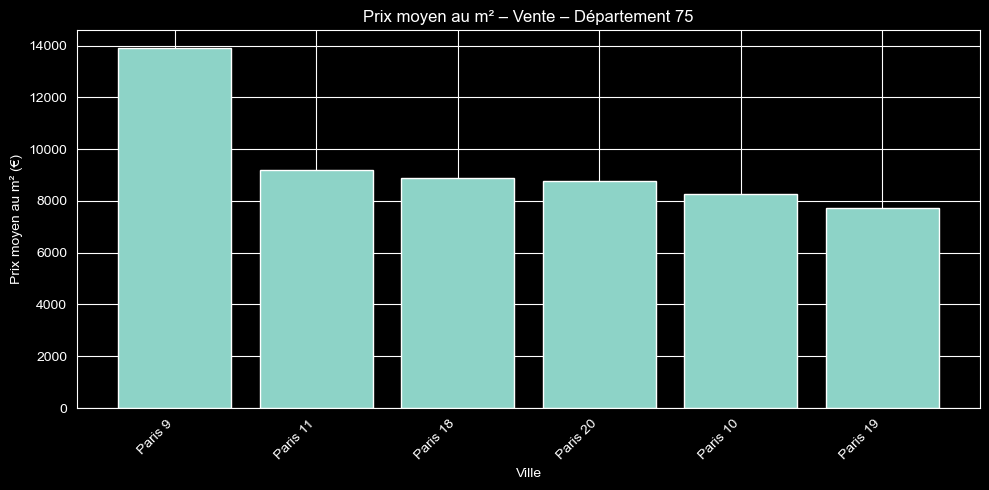

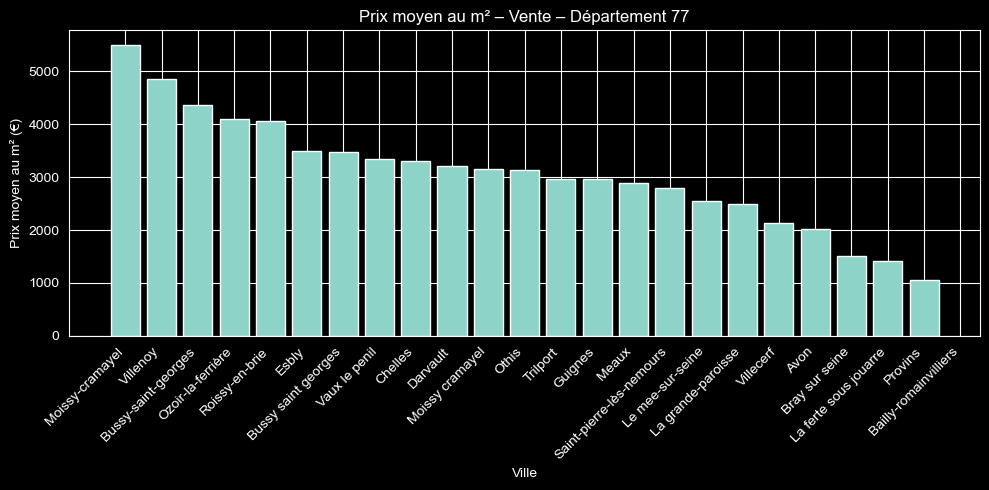

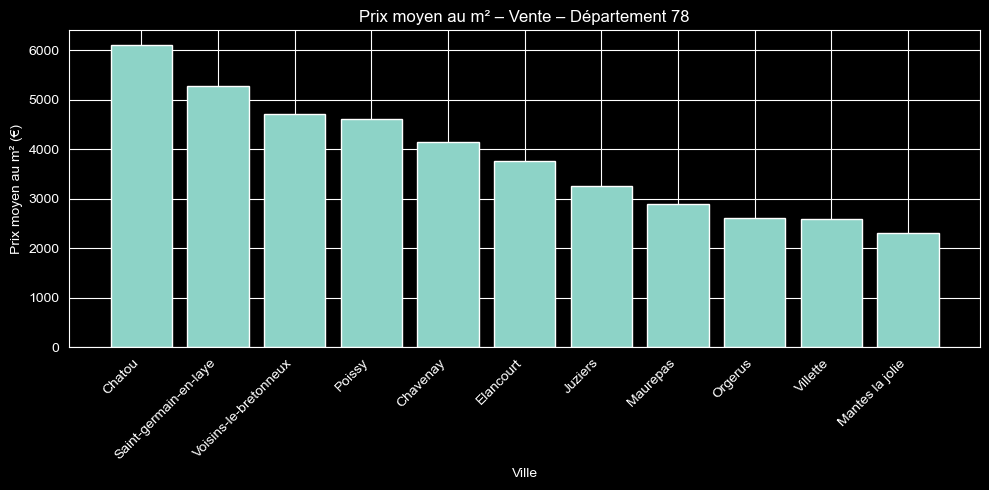

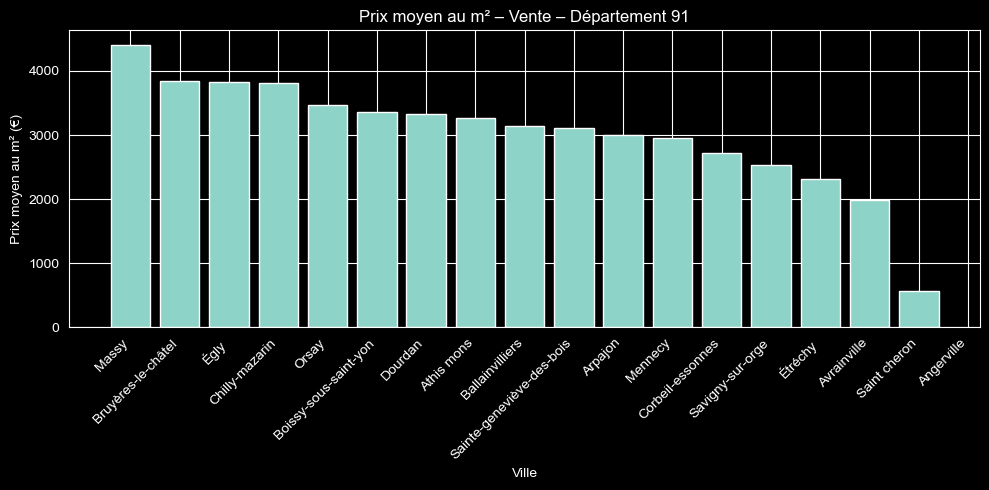

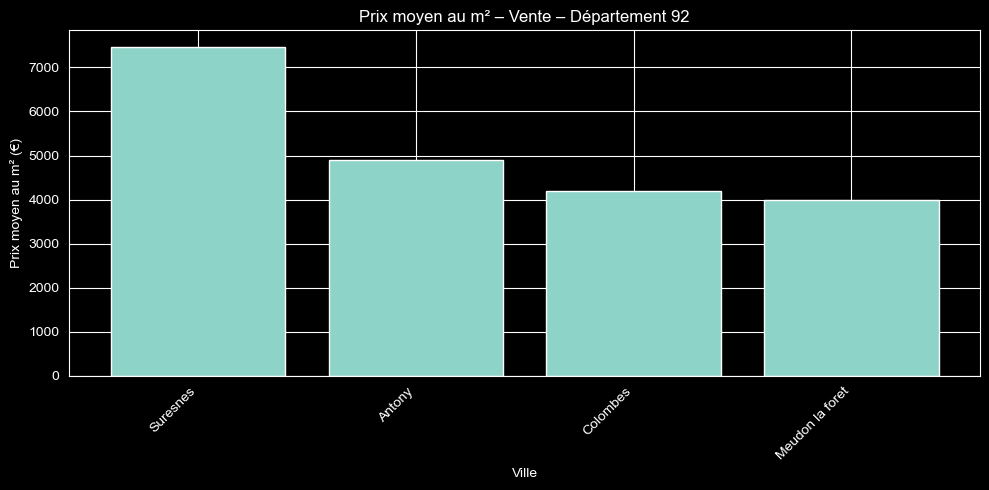

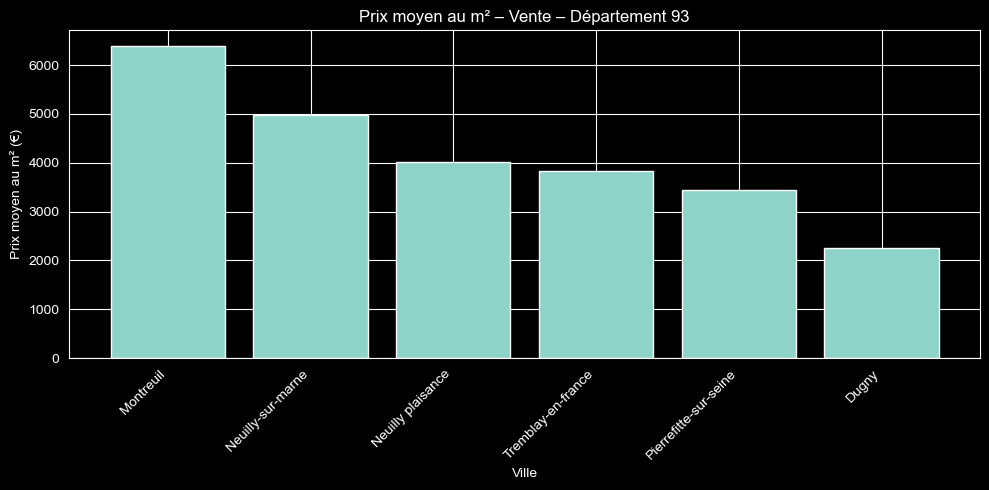

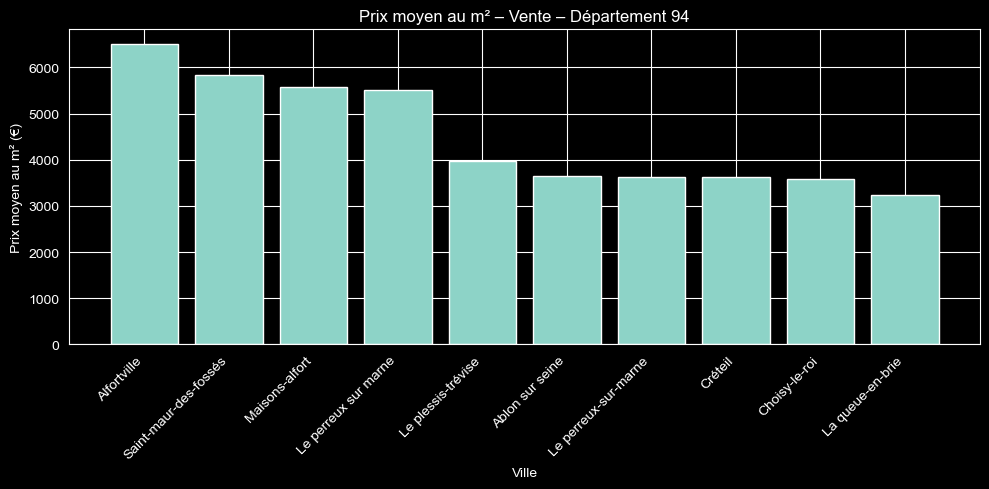

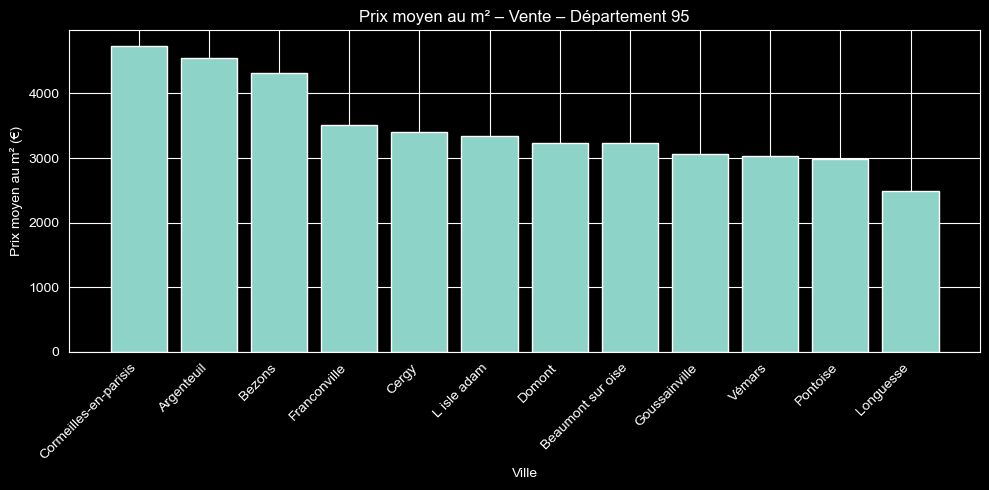

In [20]:
for dept in sorted(df_grouped["department"].dropna().unique()):
    data = (
        df_grouped[df_grouped["department"] == dept]
        .sort_values("price_m2_mean", ascending=False)
    )

    plt.figure(figsize=(10, 5))
    plt.bar(data["city"], data["price_m2_mean"])
    plt.title(f"Prix moyen au m² – Vente – Département {dept}")
    plt.xlabel("Ville")
    plt.ylabel("Prix moyen au m² (€)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
